In [1]:
import numpy as np
from obspy import read
from obspy.io.xseed import Parser
from obspy.imaging.spectrogram import _nearest_pow_2
from scipy import signal
import obspy
import matplotlib.pyplot as plt
from IPython.display import Image

from matplotlib import mlab, transforms
plt.rcParams['image.cmap'] = 'Oranges'
import math as M
import matplotlib as mpl
import numpy.ma as ma

from func.def_master import sorting_out_peaks

In [2]:
station = 'KNR01'
component = 'BHZ'
year = 2016
start_day = 290
start_day = str(start_day)
year= str(year)

## Loading Daily Data and decimate it to 25Hz by factor 2_____2018-09-13

In [ ]:
### Loading in Data for 3 days to test frequency and amplitude development over several days
day = 321
day1 = day + 1
day2 = day + 2

day = str(day)
day1 = str(day1)
day2 = str(day2)
year = str(year)





#st = read('../../TEST_DATA/DATA/KNR01/BHZ.D/1B.KNR01..BHZ.D.2016.337')
st_BHZ = read('/data/cen/u254/Essing/AWI/KNIPA_NEW/' + year + '/1B/' + station + '/' + component + '.D/1B.' + station + '..' + component + '.D.' + year + '.' + day)
#parser01 = Parser('../../TEST_DATA/Resp/RESP.1B.KNR01..BHZ')
parser01_BHZ = Parser('/data/cen/u254/Essing/AWI/CAL/RESP.1B.' + station + '..' + component)
st_BHZ = st_BHZ.decimate(factor=2)
st_BHZ_simu = st_BHZ.copy()
st_BHZ_simu.simulate(seedresp={'filename': parser01_BHZ, 'units': "ACC"})
st_BHZ_simu_filt = st_BHZ_simu.copy()
st_BHZ_simu_filt = st_BHZ_simu_filt.filter('bandpass',freqmin=.1, freqmax=10)


#st = read('../../TEST_DATA/DATA/KNR01/BHZ.D/1B.KNR01..BHZ.D.2016.337')
st_BHZ_1 = read('/data/cen/u254/Essing/AWI/KNIPA_NEW/' + year + '/1B/' + station + '/' + component + '.D/1B.' + station + '..' + component + '.D.' + year + '.' + day1)
#parser01 = Parser('../../TEST_DATA/Resp/RESP.1B.KNR01..BHZ')
#parser01_BHZ = Parser('/data/cen/u254/Essing/AWI/CAL/RESP.1B.' + station + '..' + component)
st_BHZ_1 = st_BHZ_1.decimate(factor=2)
st_BHZ_simu_1 = st_BHZ_1.copy()
st_BHZ_simu_1.simulate(seedresp={'filename': parser01_BHZ, 'units': "ACC"})
st_BHZ_simu_filt_1 = st_BHZ_simu_1.copy()
st_BHZ_simu_filt_1 = st_BHZ_simu_filt_1.filter('bandpass',freqmin=.1, freqmax=10)


#st = read('../../TEST_DATA/DATA/KNR01/BHZ.D/1B.KNR01..BHZ.D.2016.337')
st_BHZ_2 = read('/data/cen/u254/Essing/AWI/KNIPA_NEW/' + year + '/1B/' + station + '/' + component + '.D/1B.' + station + '..' + component + '.D.' + year + '.' + day2)
#parser01 = Parser('../../TEST_DATA/Resp/RESP.1B.KNR01..BHZ')
#parser01_BHZ = Parser('/data/cen/u254/Essing/AWI/CAL/RESP.1B.' + station + '..' + component)
st_BHZ_2 = st_BHZ_2.decimate(factor=2)
st_BHZ_simu_2 = st_BHZ_2.copy()
st_BHZ_simu_2.simulate(seedresp={'filename': parser01_BHZ, 'units': "ACC"})
st_BHZ_simu_filt_2 = st_BHZ_simu_2.copy()
st_BHZ_simu_filt_2 = st_BHZ_simu_filt_2.filter('bandpass',freqmin=.1, freqmax=10)


fs = int(st_BHZ_simu_filt[0].stats.sampling_rate)
date = st_BHZ_simu_filt[0].stats.endtime.ctime()[4:]

In [ ]:
fs = int(st_BH1[0].stats.sampling_rate)
first_date = st_BH1[0].stats.endtime.ctime()[4:]

## Loading in Data one day to test frequency and amplitude development over several days

In [7]:
## Depends on workstation 
## day 337 in 2016 is  December 2, 2016 (Fri)

component = 'BHZ'

st_BH1 = read('../../2016/1B/' + station + '/' + component + '.D/1B.' + station + '..' + component + '.D.' + year + '.' + start_day)
parser01_BH1 = Parser('../../TEST_DATA/Resp/RESP.1B.' + station + '..' + component)
#st_BH1 = read('/data/cen/u254/Essing/AWI/KNIPA_NEW/' + year + '/1B/' + station + '/' + component + '.D/1B.' + station + '..' + component + '.D.' + year + '.' + day)
#parser01_BH1 = Parser('/data/cen/u254/Essing/AWI/CAL/RESP.1B.' + station + '..' + component)

# Decimate signal by factor of 2 to 25Hz

st_BH1 = st_BH1.decimate(factor=2)

# Remove response

st_BH1_simu = st_BH1.copy()
st_BH1_simu.simulate(seedresp={'filename': parser01_BH1, 'units': "ACC"})

# Filter signal with corner freqs at .1 and 10Hz

st_BH1_simu_filt = st_BH1_simu.copy()
st_BH1_simu_filt = st_BH1_simu_filt.filter('bandpass',freqmin=.1, freqmax=10)

/home/david/anaconda3/envs/vgseis_2018/lib/python3.6/site-packages/obspy/signal/detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


In [ ]:
figname = str(st[0].stats.station) + st[0].stats.channel #+ st[0].stats.starttime)

print(((str(st[0].stats.station), st[0].stats.channel,st[0].stats.starttime)))

In [32]:
xtest = np.linspace(0,19,200)

sin_test = np.sin(2*np.pi*xtest)
SIN = np.fft.rfft(sin_test)

#win = mlab.window_hanning(sin_test)

/home/david/anaconda3/envs/vgseis_2018/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


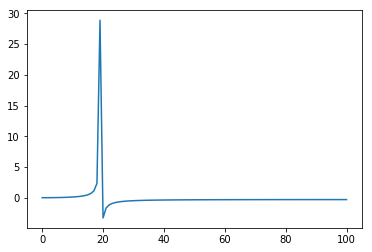

In [36]:
plt.plot(SIN)
#plt.plot(win)
plt.show()

## Loading Data in loop and decimate it to 25Hz by factor 2_2018-09-13

In [27]:
station = 'KNR01'
component = 'BHZ'
year = 2016
start_day = 315


#start_day = str(day)

year = str(year)

number_of_days = 1




per_lap = .1




freq_minimal_value = 3
distance = 120
maxima= 1
decimate_factor = 1e-15


for i in range(number_of_days):
    #print(i)
    start_day = str(int(start_day)+1)
    #print(start_day)
    ## Depends on workstation 
    st_BHZ = read('../../2016/1B/' + station + '/' + component + '.D/1B.' + station + '..' + component + '.D.' + year + '.' + start_day)
    #st_BHZ = read('/data/cen/u254/Essing/AWI/KNIPA_NEW/' + year + '/1B/' + station + '/' + component + '.D/1B.' + station + '..' + component + '.D.' + year + '.' + start_day)
    parser01_BHZ = Parser('../../TEST_DATA/Resp/RESP.1B.' + station + '..' + component)
    #parser01_BHZ = Parser('/data/cen/u254/Essing/AWI/CAL/RESP.1B.' + station + '..' + component)
    st_BHZ = st_BHZ.decimate(factor=2)
    fs = int(st_BHZ[0].stats.sampling_rate)
    st_BHZ_simu = st_BHZ.copy()
    st_BHZ_simu.simulate(seedresp={'filename': parser01_BHZ, 'units': "ACC"})
    st_BHZ_simu_filt = st_BHZ_simu.copy()
    st_BHZ_simu_filt = st_BHZ_simu_filt.filter('bandpass',freqmin=.1, freqmax=10)
    data_BHZ = np.array(st_BHZ_simu_filt[0].data)
    data_BHZ -= data_BHZ.mean()
    
    npts = len(data_BHZ)
    wlen = float(fs*10)
    nfft = int(_nearest_pow_2(wlen * fs))
    nlap = int(nfft * float(per_lap))
    # hanning window is set to default in mlab.specgram
    specgram_BHZ, freq, time = mlab.specgram(data_BHZ, Fs=fs, window=win, NFFT=nfft, noverlap=0)
    #print(np.shape(specgram_BHZ))
    specgram_BHZ_masekd = ma.array(specgram_BHZ)
    specgram_BHZ_masekd[0:1000,:] = ma.masked
    specgram_BHZ_masekd[1300:np.shape(specgram_BHZ)[0],:] = ma.masked
    
    threshold = np.amax(specgram_BHZ_masekd)*decimate_factor
    max_array_Z_masked, amp_values,frequency_indices, frequency_values = sorting_out_peaks(input_data=specgram_BHZ_masekd, freq_vec=freq, maxima=maxima, distance = distance, threshold = threshold, freq_minimal_value = freq_minimal_value)
    
    

    
    
    
    if i==0:
        first_date = st_BHZ[0].stats.endtime.ctime()[4:]
        all_days_amp_values = np.zeros((number_of_days, len(amp_values)))
        all_days_freq_values = np.zeros((number_of_days, len(frequency_values)))
        time_stack = time
        
        # set first specgram to specgram_merged
        
        specgram_merged = specgram_BHZ
        
    else:
        specgram_merged = np.append(specgram_merged, specgram_BHZ, axis=1)
    
    
    if i!=1:
        time_stack = np.append(time_stack, time_stack[-1]+time)

    
    all_days_amp_values[i,:] = amp_values
    all_days_freq_values[i,:] = frequency_values
                                       
                                       
    
    
    
    
    

/home/david/anaconda3/envs/vgseis_2018/lib/python3.6/site-packages/obspy/signal/detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


TypeError: object of type 'float' has no len()

In [ ]:
###### print((freq[750]))

In [39]:
all_days_amp_values = all_days_amp_values.flatten()

all_days_freq_values = all_days_freq_values.flatten()

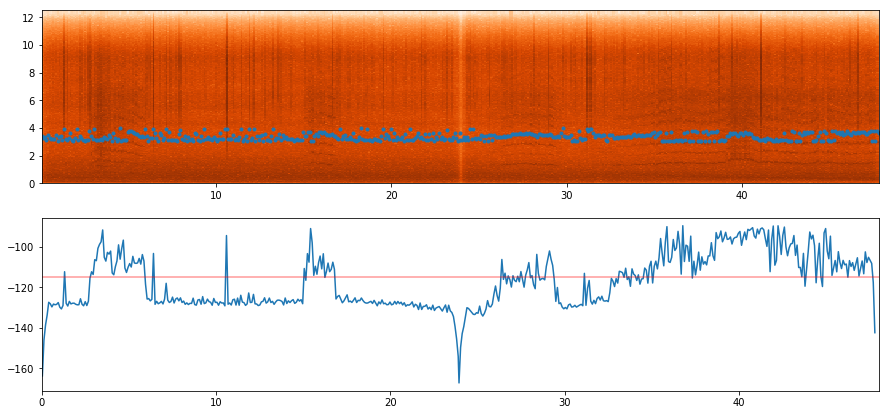

In [40]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,7))
axs = axs.flatten()
axs[0].pcolormesh(time_stack/3600,freq,10*np.log10(specgram_merged))
axs[0].plot(time_stack/3600, all_days_freq_values,'.')
axs[1].plot(time_stack/3600, 10 * np.log10(all_days_amp_values))
axs[1].axhline(-115, color='red', alpha=.4)
axs[1].set_xlim(0,48)
plt.show()

In [ ]:
print(np.shape(time_stack))

In [ ]:
#time_stack = np.hstack((time, time[-1]+time, (time[-1]+time)[-1]+time))

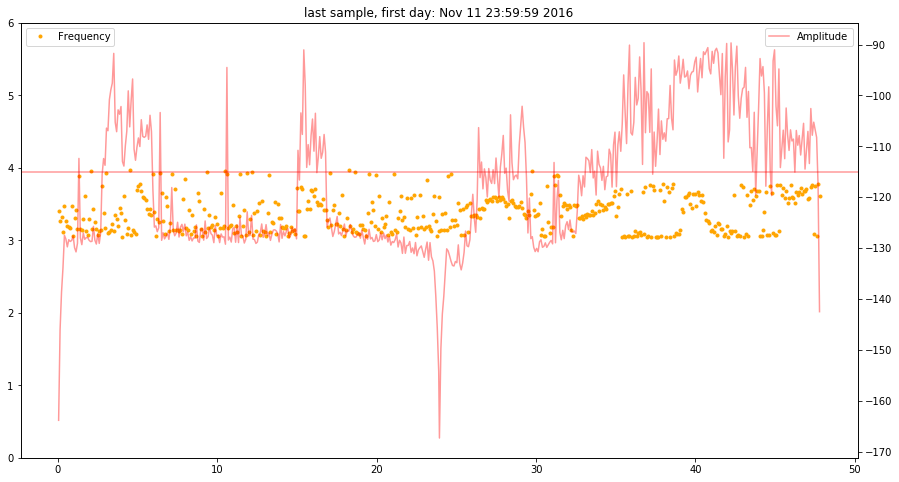

In [41]:
fig, ax1 = plt.subplots(figsize=(15,8))

ax1.plot(time_stack/3600, all_days_freq_values,'.', color='orange', label='Frequency')
ax1.legend(loc='upper left')
ax1.set_ylim((0,6))
ax2 = ax1.twinx()
ax2.plot(time_stack/3600, 10 * np.log10(all_days_amp_values), '-', color='red', alpha=.4, label='Amplitude')
ax2.axhline(-115, color='red', alpha=.4)
ax2.legend(loc='upper right')
plt.title('last sample, first day: ' + first_date)
plt.show()

In [ ]:
test_array = np.array([[0,2,3]])
np.append(test_array, [[2,4,2]], axis=0)

# Filtercorner testing

In [ ]:
st_filt = st.copy()
st_filt = st_filt.filter('bandpass',freqmin=1, freqmax=8)
st_array = np.asarray(st[0].data)
st_filt_array = np.asarray(st_filt[0].data)

fs = int(st_filt[0].stats.sampling_rate)

t_start = fs*20000
t1_start = t_start+fs*8000
st_nofilt_10_min = st_array[t_start:t_start+10*fs*60]
st_filt_10_min = st_filt_array[t_start:t_start+10*fs*60]
#test1_10_min = st_array[t1_start:t1_start+10*fs*60]

In [ ]:
f, Pxx = signal.periodogram(st_nofilt_10_min, fs=fs)
f1,Pxx1 = signal.periodogram(st_filt_10_min, fs=fs)

In [ ]:
#plt.semilogy(f, Pxx)
plt.subplot(121)
plt.plot(f, Pxx,label='nofilt')
#plt.xlim(0,5)
#plt.ylim(1e-4,1e6)
plt.grid()

plt.subplot(122)
plt.plot(f1, Pxx1,label='filt')
#plt.xlim(0,1)
#plt.ylim(1e-4,1e6)
plt.grid()

plt.show()

# Remove response

In [ ]:
parser01 = Parser('../TEST_DATA/Resp/RESP.1B.KNR01..BHZ')
st_simu = st.copy()
st_simu.simulate(seedresp={'filename': parser01, 'units': "ACC"})

In [ ]:
st_simu_filt = st_simu.copy()
st_simu_array = np.array(st_simu[0].data)

st_simu_filt = st_simu_filt.filter('highpass',freq=1)
st_simu_filt_array = np.array(st_simu_filt[0].data)

In [ ]:
plt.plot(st_simu_filt_array)
#plt.xlim(318800,319500)
plt.show()

In [ ]:
t_start = fs*20000
t1_start = t_start+fs*30000

st_simu_nofilt_10_min = st_simu_array[t_start:t_start+10*fs*60]
st_simu_filt_10_min = st_simu_filt_array[t_start:t_start+10*fs*60]

In [ ]:
f2, Pxx2 = signal.periodogram(st_simu_nofilt_10_min, fs=fs)
f3, Pxx3 = signal.periodogram(st_simu_filt_10_min, fs=fs)

In [ ]:
plt.figure(figsize=(11,11))
#plt.semilogy(f, Pxx)
plt.subplot(221)
plt.plot(f, Pxx,label='nofilt')
#plt.xlim(0,5)
#plt.ylim(1e-4,1e6)
plt.legend()
plt.grid()

plt.subplot(222)
plt.plot(f1, Pxx1,label='filt')
#plt.xlim(0,1)
#plt.ylim(1e-4,1e6)
plt.legend()
plt.grid()

#plt.semilogy(f, Pxx)
plt.subplot(223)
plt.plot(f2, Pxx2, label='st_simu_nofilt')
#plt.xlim(0,1)
#plt.ylim(1e-4,1e6)
plt.legend()
plt.grid()

plt.subplot(224)
plt.plot(f3, Pxx3, label='st_simu_filt')
#plt.xlim(0,1)
#plt.ylim(1e-4,1e6)
plt.legend()
plt.grid()

plt.show()

# Signal vs. no signal

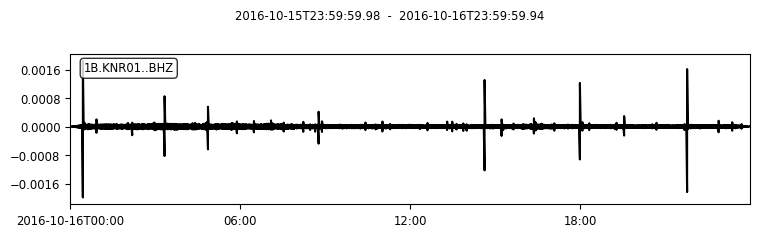

In [11]:
st_BH1_simu_filt.plot()

In [12]:
st_simu_filt = st_BH1_simu_filt.copy()

In [13]:
st_simu_array = np.array(st_simu_filt[0].data)

In [14]:
st_simu_array1 = np.append(st_simu_array, 0)

In [23]:
print(st_BH1_simu_filt[0].stats.sampling_rate)

25.0


In [30]:
fs = st_BH1_simu_filt[0].stats.sampling_rate
t_signal_start = int(20000*fs)
t_nosignal_start = int(28000*fs)
win_len = int(4*60*fs)

In [32]:
st_simu_signal = st_simu_array[t_signal_start:t_signal_start+win_len]
f_sig, Pxx_sig = signal.periodogram(st_simu_signal, fs=fs)

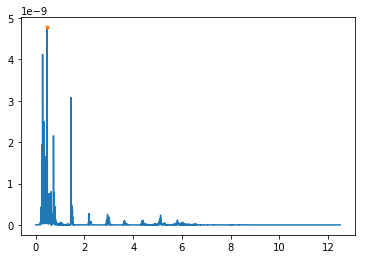

In [34]:
plt.plot(f_sig, Pxx_sig)
plt.plot(f_sig[np.argmax(Pxx_sig)], np.max(Pxx_sig), '.')
#plt.plot(f_sig[np.argmax(Pxx_sig[::1])], np.max(Pxx_sig[::1]), 'o')
plt.show()

In [36]:
def search_maxima_in_periodogram (maxima, data, fs=fs, wlen):
    
    '''Function to cut daily data into several windows and searche for maxima in each window
    Input:
    
    maxima    float        number of maxima to search for
    signal    array        array with data
    fs        float        value of sampling rate
    wlen      int          value of window length in seconds
    
    '''

    
    
    
    
    f_sig, Pxx_sig = signal.periodogram(data, fs=fs)
    index_max = np.zeros(maxima)
    value_max_f = np.zeros(maxima)
    value_max = np.zeros(maxima)
    Pxx_sig1 = Pxx_sig.copy()
    
    #wlen = wlen * fs
    #st_simu_signal_1_min = st_simu_array[t_signal_start:t_signal_start+win_len]
    #for wlen in data:
        #data_cut = st_simu_array[t_signal_start:t_signal_start+win_len]
        #print(data_cut)
    for i in range(maxima):

        # first maxima


        index_max[i] = np.argmax(Pxx_sig1)
        value_max_f[i] = f_sig[np.argmax(Pxx_sig1)]
        value_max[i] = np.max(Pxx_sig1)

        minval = np.min(Pxx_sig1)
        Pxx_sig1[int(index_max[i]-10):int(index_max[i]+10)] = minval-100
    #fname = '../Plots/PSD/KNR01..BHZ.D.2016.337' + str(t_signal_start) + '-' + str(t_signal_start+ win_len)
    #plt.semilogy(f_sig, Pxx_sig)
    #plt.semilogy(value_max_f, value_max, 'o')
    #plt.plot(value_ond_max_f, value_second_max, 'o')
    #plt.plot(value_third_max_f, value_third_max, 'o')
    #plt.plot(value_fourth_max_f, value_fourth_max, 'o')
    #plt.plot(f_sig[np.argmax(Pxx_sig[::1])], np.max(Pxx_sig[::1]), 'o')
    #plt.savefig(fname=fname)
    return(value_max_f, value_max)

SyntaxError: non-default argument follows default argument (<ipython-input-36-2cb7dc7d016f>, line 1)

In [ ]:
maxima = 8
data= st_simu_signal_1_min

value_max_f, value_max = search_maxima_in_periodogram(maxima, data, fs=fs)

In [ ]:
plt.plot(f_sig, Pxx_sig)
plt.plot(value_max_f, value_max, 'o')
plt.ylim(0*1e-10,6*1e-10)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
#plt.xlim(1.2,2)
plt.grid()
#plt.plot(value_ond_max_f, value_second_max, 'o')
#plt.plot(value_third_max_f, value_third_max, 'o')
#plt.plot(value_fourth_max_f, value_fourth_max, 'o')
#plt.plot(f_sig[np.argmax(Pxx_sig[::1])], np.max(Pxx_sig[::1]), 'o')
plt.show()



# next steps...
# 1) while schleife mit abbruchkriterium nach 4-6 Durchlaeufen
# 2) als definition schreiben
# 3) 

# mlab.specgram

In [ ]:
from matplotlib import mlab, transforms
plt.rcParams['image.cmap'] = 'Oranges'
import math as M
import matplotlib as mpl
import numpy.ma as ma

In [ ]:
def _nearest_pow_2(x):
    """
    copied from obspy specgram
    Find power of two nearest to x
    >>> _nearest_pow_2(3)
    2.0
    >>> _nearest_pow_2(15)
    16.0
    :type x: float
    :param x: Number
    :rtype: Int
    :return: Nearest power of 2 to x
    """
    a = M.pow(2, M.ceil(np.log2(x)))
    b = M.pow(2, M.floor(np.log2(x)))
    if abs(a - x) < abs(b - x):
        return a
    else:
        return b

    

In [ ]:
#data_BHZ = np.array(st_BHZ_simu_filt[0].data)
#data_BHZ -= data_BHZ.mean()
data_BHZ_1 = np.array(st_BHZ_simu_filt_1[0].data)
data_BHZ_1 -= data_BHZ_1.mean()
#data_BHZ_2 = np.array(st_BHZ_simu_filt_2[0].data)
#data_BHZ_2 -= data_BHZ_2.mean()

In [ ]:
per_lap = .1
wlen = float(fs*10)
npts = len(data_BHZ_1)
nfft = int(_nearest_pow_2(wlen * fs))
nlap = int(nfft * float(per_lap))

print(wlen)

In [ ]:
def searchmaxima(maxima, distance, data, scale_vector=0):
    
    '''
    To find maxima in data, with option to give vecotr with scaling values for x-Axis
    
    Input:
    maxima    scalar        value of maxima to find
    distance  scalar        value for nearest next maxima to search for
    data      1-D array     numpy array of data 
    freqvec   1-D array     numpy array of data with values to scale x-Axis (optional)
    
    '''

    index_max = np.zeros(maxima)
    value_max_f = np.zeros(maxima)
    value_max = np.zeros(maxima)
    data1 = data.copy()
    
    if type(scale_vector) == int:
    
        for i in range(maxima):
            index_max[i] = np.argmax((data1))
            value_max[i] = np.max((data1))
            #index_max[i] = np.argmax(Pxx_sig1)
            #value_max_f[i] = freqvec[np.argmax(data1)]
            #value_max[i] = np.max(Pxx_sig1)

            minimal_value = np.min(data1)

            data1[int(index_max[i]-distance):int(index_max[i]+distance)] = minimal_value-100
        return(value_max, index_max)
    
    else:
        for i in range(maxima):
            index_max[i] = np.argmax((data1))
            value_max[i] = np.max((data1))
            value_max_f[i] = scale_vector[np.argmax(data1)]
            minimal_value = np.min(data1)
        
            data1[int(index_max[i]-distance):int(index_max[i]+distance)] = minimal_value-100
            
        return(value_max, index_max,value_max_f)

In [ ]:
def sorting_out_peaks(input_data, freq_vec, maxima, distance ,threshold, freq_minimal_value):
    '''
    Calls searchmaxima and just hands maxima values which meet with two options:
            - there is a maximum below a certain frequency value (freq_minimal_value)
            - maximum amplitude value is higher then certain ampiltude (threshold) 
    
    
    '''
    
    amp_values = np.zeros((np.shape(input_data)[1]))
    frequency_indices = np.zeros_like(amp_values)
    frequency_values = np.zeros_like(amp_values)
    
    
    max_array = np.zeros_like(input_data)
    for j in range(np.shape(input_data)[1]):
        win_average = np.mean(input_data.T[j])
        #if win_average < all_win_average:
        # not a good solution. deletes as well some instrument signal

        amp_values[j], frequency_indices[j], frequency_values[j] = searchmaxima(maxima=maxima, data=input_data.T[j],distance=distance, scale_vector=freq_vec)

        #print(any(frequency_value<freq_minimal_value))
        if any(frequency_values<freq_minimal_value) == True:
            #print((frequency_value))
            for i in range(len(frequency_indices)):


                if amp_values[i] > threshold:
                    max_array[int(frequency_indices[i]),j] = amp_values[i]
    return (max_array, amp_values, frequency_indices, frequency_values)

In [ ]:
#specgram_BH1, freq, time = mlab.specgram(data_BHZ_1, Fs=fs, NFFT=nfft, noverlap=0)
specgram_BHZ_1, freq, time = mlab.specgram(data_BHZ_1, Fs=fs, NFFT=nfft, noverlap=0)
#specgram_BHZ_2, freq, time = mlab.specgram(data_BHZ_2, Fs=fs, NFFT=nfft, noverlap=0)

In [ ]:
#specgram_BH1_masekd = ma.array(specgram_BH1)
#specgram_BH1_masekd[0:660,:] = ma.masked
#specgram_BH1_masekd[950:np.shape(specgram_BH1)[0],:] = ma.masked

specgram_BHZ_masekd1 = ma.array(specgram_BHZ_1)
specgram_BHZ_masekd1[0:660,:] = ma.masked
specgram_BHZ_masekd1[950:np.shape(specgram_BHZ_1)[0],:] = ma.masked

#specgram_BHZ_masekd2 = ma.array(specgram_BHZ_2)
#specgram_BHZ_masekd2[0:660,:] = ma.masked
#specgram_BHZ_masekd2[950:np.shape(specgram_BHZ_2)[0],:] = ma.masked


threshold = 10**-11.5
freq_minimal_value = 0
distance = 120
maxima= 1

In [ ]:
#max_array_Z = sorting_out_peacks(input_data=specgram_BHZ, freq_vec=freq, maxima=maxima, threshold = threshold, distance = distance, freq_minimal_value = freq_minimal_value)
#max_array_1_masked, amp_values, frequency_indices, frequency_values = sorting_out_peaks(input_data=specgram_BH1_masekd, freq_vec=freq, maxima=maxima, distance = distance, threshold = threshold, freq_minimal_value = freq_minimal_value)

max_array_Z_masked1, amp_values1, frequency_indices1, frequency_values1 = sorting_out_peaks(input_data=specgram_BHZ_masekd1, freq_vec=freq, maxima=maxima, distance = distance, threshold = threshold, freq_minimal_value = freq_minimal_value)
#max_array_Z_masked2, amp_values2, frequency_indices2, frequency_values2 = sorting_out_peaks(input_data=specgram_BHZ_masekd2, freq_vec=freq, maxima=maxima, distance = distance, threshold = threshold, freq_minimal_value = freq_minimal_value)

In [ ]:
print(np.shape(max_array_Z_masked1), np.shape(amp_values1), np.shape(frequency_indices1), np.shape(frequency_values1))

In [ ]:
three_days_freq = np.hstack((frequency_values, frequency_values1, frequency_values2))
three_days_amp = np.hstack((amp_values, amp_values1, amp_values2))
time_stack = np.hstack((time, time[-1]+time, (time[-1]+time)[-1]+time))
three_days_max_array = np.hstack((max_array_Z_masked,max_array_Z_masked1,max_array_Z_masked2))

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,8))

ax1.plot(time_stack/3600, three_days_freq,'.', color='orange', label='Frequency')
ax1.legend(loc='upper left')
ax1.set_ylim((0,6))
ax2 = ax1.twinx()
ax2.plot(time_stack/3600,  10 * np.log10(three_days_amp), '-', color='red', alpha=.4, label='Amplitude')
ax2.axhline(-115, color='red', alpha=.4)
ax2.legend(loc='upper right')
plt.title('last sample, first day: ' + first_date)
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.pcolormesh(time_stack,freq, 10*np.log10(three_days_max_array))
plt.show()

## Short step into curve fitting

In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

In [ ]:
a, c = np.random.exponential(size=2)
b, d = np.random.randn(2)

In [ ]:
n = 100
x = np.linspace(-10., 10., n)
y_model = f(x, a, b, c, d)
y = y_model + a * .2 * np.random.randn(n)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y_model, '--k')
ax.plot(x, y, 'o')

In [ ]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, x, y)

In [ ]:
test = np.hstack((max_array_Z_masked, max_array_Z_masked1, max_array_Z_masked2))
time_stack = np.hstack((time, time[-1]+time, (time[-1]+time)[-1]+time))

In [ ]:
#vmin_spec = 10 * np.log10(np.min(np.array([specgram_BHZ,specgram_BH1,specgram_BH2])))
#vmax_spec = 10 * np.log10(np.max(np.array([specgram_BHZ,specgram_BH1,specgram_BH2])))

In [ ]:
import matplotlib.gridspec as gridspec





fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,7))
axs = axs.flatten()

gs = gridspec.GridSpec(2, 6)
gs.update(wspace=0.5)
axs[0] = plt.subplot(gs[0,:6])
axs[1] = plt.subplot(gs[1, :2])
axs[2] = plt.subplot(gs[1, 2:4])
axs[3] = plt.subplot(gs[1, 4:6])


axs[0].pcolormesh(time_stack/3600, freq, 10 * np.log10(test))
axs[1].pcolormesh(time/3600, freq,10 * np.log10(max_array_Z_masked), cmap='YlOrRd')
#axs[0].axhline(2, 0,86400, color='black')
#axs[1].pcolormesh(time, freq,10 * np.log10(specgram_BHZ), vmin=vmin_spec, vmax=vmax_spec, cmap='winter')
#axs[0].axhline(2, 0,86400, color='black')
#axs[0].pcolormesh(time, freq,10 * np.log10(specgram_BHZ_masekd1), vmin=vmin_spec, vmax=vmax_spec, cmap='winter')
#axs[0].pcolormesh(time, freq,10 * np.log10(max_array_Z), vmin=vmin_spec, vmax=vmax_spec, cmap='YlOrRd')

axs[2].pcolormesh(time/3600, freq,10 * np.log10(max_array_Z_masked1), cmap='YlOrRd')
axs[3].pcolormesh(time/3600, freq,10 * np.log10(max_array_Z_masked2), cmap='YlOrRd')

#axs[1].pcolormesh(time, freq,10 * np.log10(max_array_Z_masked1), vmin=vmin_spec, vmax=vmax_spec, cmap='YlOrRd')
#axs[1].pcolormesh(time, freq,10 * np.log10(max_array_Z_masked), vmin=vmin_spec, vmax=vmax_spec, cmap='YlOrRd')

axs[1].set
plt.show()